In [ ]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Exploration

## Data Checks

In [19]:
file_name = 'ChurnTelco.csv'

train_df = pd.read_csv(file_name)
train_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [20]:
train_df.shape

(7043, 21)

In [21]:
# Se va a eliminar el ID del cliente pues esto es solo un identificador que no agrega informacion para la predicion
train_df.drop(['customerID'],axis=1,inplace=True)
train_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [23]:
# Since TotalCharges is object it has to be converted to float
train_df['TotalCharges'] = pd.to_numeric(train_df['TotalCharges'], errors='coerce')


In [24]:
train_df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


- La antiguedad maxima de los cliente es de 72 meses y en promedio es de 32 meses.
- El promedio de cargos mensuales de los clientes es de 64.76, pero el minimo es de 18.25

In [25]:
# Check duplicated values
print(train_df.duplicated().sum())

22


In [26]:
# Remove duplicate rows
train_df = train_df.drop_duplicates()
print(train_df.duplicated().sum())

0


In [27]:
cat_features = train_df.select_dtypes(include='object').columns
num_features = train_df.select_dtypes(exclude='object').columns

print(f"numerical features are: {num_features}\n")
print(f"categorical features are: {cat_features}\n")

numerical features are: Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

categorical features are: Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')



In [28]:
train_df.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6530
Churn                  2
dtype: int64

In [29]:
train_df[cat_features].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
Churn               2
dtype: int64

In [30]:
train_df[num_features].nunique()

SeniorCitizen        2
tenure              73
MonthlyCharges    1585
TotalCharges      6530
dtype: int64

In [35]:
target = 'Churn'
num_features_real = ['tenure', 'MonthlyCharges', 'TotalCharges']
cat_features_real = list(set(train_df.columns) - set(num_features_real) - {target})

print("categorical: ",cat_features_real)
print("numeric: ", num_features_real)

categorical:  ['PaymentMethod', 'OnlineSecurity', 'OnlineBackup', 'StreamingTV', 'gender', 'MultipleLines', 'PhoneService', 'InternetService', 'PaperlessBilling', 'Partner', 'DeviceProtection', 'SeniorCitizen', 'StreamingMovies', 'Contract', 'TechSupport', 'Dependents']
numeric:  ['tenure', 'MonthlyCharges', 'TotalCharges']


In [ ]:
# Categorical features values
for feature in cat_features_real:
    values = train_df[feature].unique()
    print(f"{feature}: {values}\n")

PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

StreamingTV: ['No' 'Yes' 'No internet service']

gender: ['Female' 'Male']

MultipleLines: ['No phone service' 'No' 'Yes']

PhoneService: ['No' 'Yes']

InternetService: ['DSL' 'Fiber optic' 'No']

PaperlessBilling: ['Yes' 'No']

Partner: ['Yes' 'No']

DeviceProtection: ['No' 'Yes' 'No internet service']

SeniorCitizen: [0 1]

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['Month-to-month' 'One year' 'Two year']

TechSupport: ['No' 'Yes' 'No internet service']

Dependents: ['No' 'Yes']



## Missing Values

In [33]:
# Percentage of missing values
missing_values = train_df.isnull().mean()*100
missing_values

gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156673
Churn               0.000000
dtype: float64

In [34]:
# Drop all rows with any missing values
train_df = train_df.dropna()

## Exploration Summary

- **22 duplicate rows** were identified in the dataset and removed to avoid redundancy in the information.

- **Categorical variables:**  
  ['gender', 'partner', 'dependents', 'phone_service',  
  'multiple_lines', 'internet_service', 'online_security',  
  'online_backup', 'device_protection', 'tech_support',  
  'streaming_tv', 'streaming_movies', 'contract',  
  'paperless_billing', 'payment_method','senior_citizen']

- **Numerical variables:**  
  ['tenure', 'monthly_charges', 'total_charges']

- The **senior_citizen** feature was originally categorical but has already been converted to a numerical value.  
  Therefore, the remaining categorical features should also be **encoded as numerical values** to be properly processed by a model.

- The complete dataset has a **shape of (7043, 21)**, with **20 features**.  
  The customer ID is removed, leaving **19 available features**:  
  - **3 numerical** features  
  - **16 categorical** features  

- The categorical features have **low dimensionality**, with the highest number of unique values being **4**.

- **0.15% missing values** were found in the **TotalCharges** column.


# EDAS

## Numerical Variable Distribution

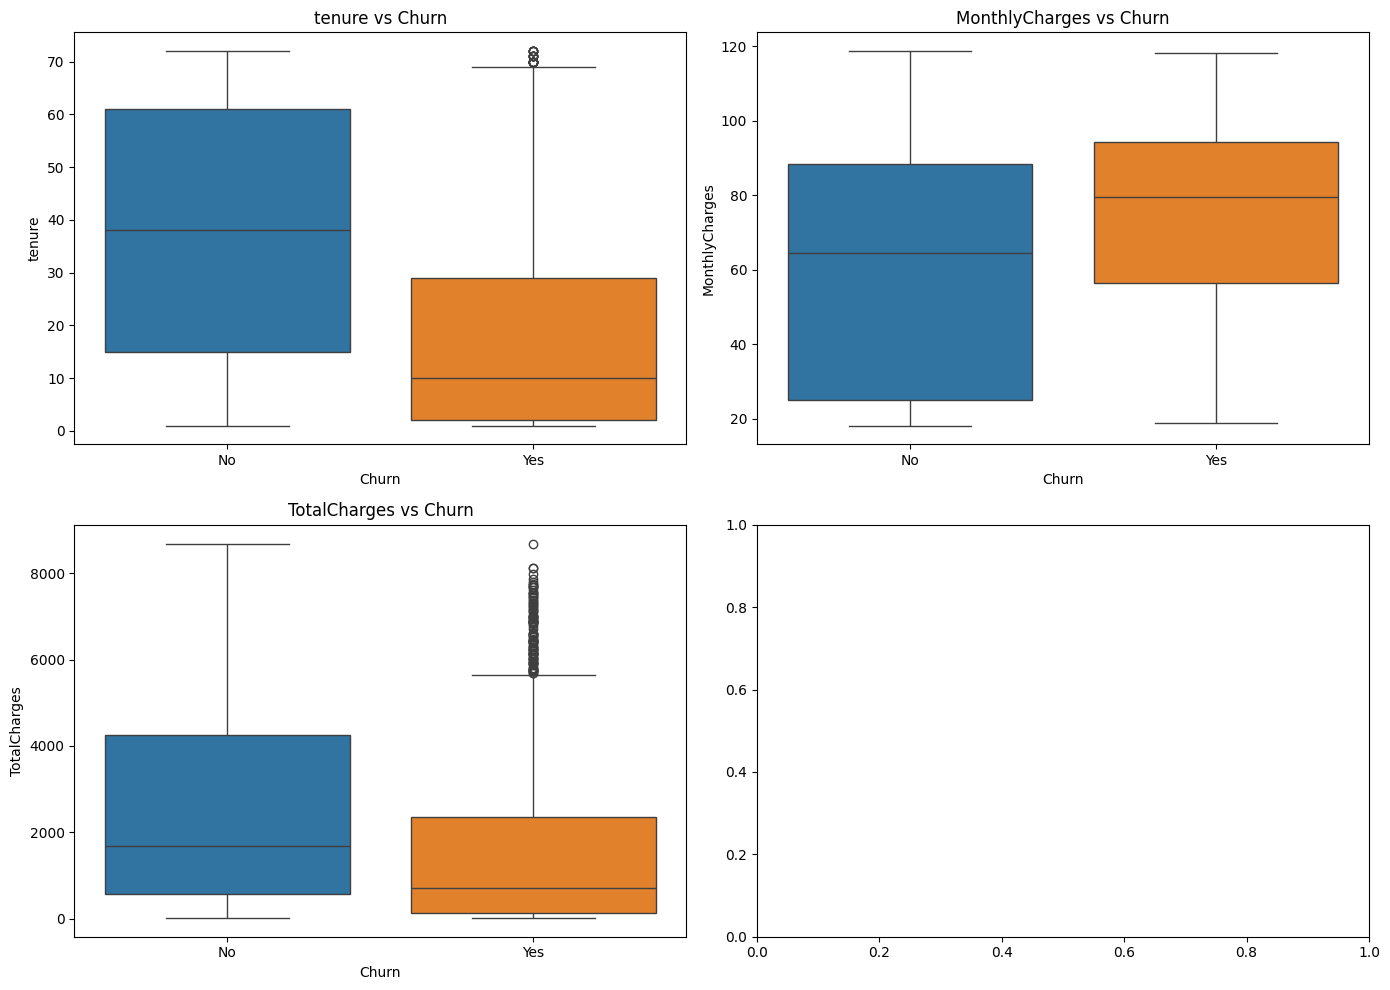

In [37]:
def plot_boxplots(df, numerical_features, target):
    """
    Create a grid of boxplots for numerical features against the target.
    
    Parameters:
    - df: DataFrame containing the data
    - numerical_features: List of numerical column names to plot
    - target: The target column name
    """
    # Number of features to plot
    num_features = len(numerical_features)
    
    # Calculate number of rows and columns for the subplot grid
    nrows = (num_features + 1) // 2
    ncols = 2 if num_features > 1 else 1
    
    # Create subplots
    fig, axarr = plt.subplots(nrows, ncols, figsize=(14, 10))
    
    # Flatten the axes array for easy iteration if there are multiple subplots
    axarr = axarr.flatten()
    
    # Plot each numerical feature against the target
    for i, feature in enumerate(numerical_features):
        sns.boxplot(y=feature, x=target, hue=target, data=df, ax=axarr[i])
        axarr[i].set_title(f'{feature} vs {target}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()


plot_boxplots(df=train_df, numerical_features=num_features_real,target=target)

### Box Plot Analysis

#### 1. Tenure vs Churn
- **Distribution**: The tenure distribution is **right-skewed** for churned customers, meaning most customers who churned had lower tenure values.
- Customers who did **not** churn (No) generally have a **higher tenure**, with a median tenure around the midpoint.
- Churned customers (Yes) have a **lower median tenure**, indicating that they leave earlier in their subscription period.
- The distribution shows that long-term customers are less likely to churn.

#### 2. Monthly Charges vs Churn
- **Distribution**: The distribution is more **evenly spread** across both groups, but churned customers have a slightly **higher concentration** in the upper range of monthly charges.
- Customers who churned (Yes) tend to have **higher monthly charges** on average compared to non-churned customers.
- The median monthly charge for churned customers is **higher** than for those who stayed.
- This suggests that **higher monthly costs may contribute to churn**.

#### 3. Total Charges vs Churn
- **Distribution**: The distribution is **heavily right-skewed** for churned customers because their total charges are generally lower due to shorter tenure.
- **Outliers**: Several churned customers have **high total charges**, but they are exceptions rather than the norm.
- Customers who stayed (No) have significantly higher **total charges**, which makes sense as they have longer tenures.
- Churned customers (Yes) generally have **lower total charges**, but there are outliers with high total charges.
- This reinforces that customers who leave early tend to accumulate fewer total charges.

### Key Insights:
1. **Tenure Impact on Churn**: Long-term customers tend to stay, while new customers are more likely to churn.
2. **Cost Considerations**: Higher **monthly charges** are correlated with higher churn, possibly indicating price sensitivity.
3. **Total Charges & Churn**: Since total charges are dependent on tenure, churned customers naturally have lower total charges, due to their shorter time with the service.

#### Recommendations:
- Offer **discounts or incentives** to newer customers to increase retention.
- Identify **high monthly charge** customers and provide cost-effective options to reduce churn.
- Focus on improving **early customer experience** to encourage longer tenure.

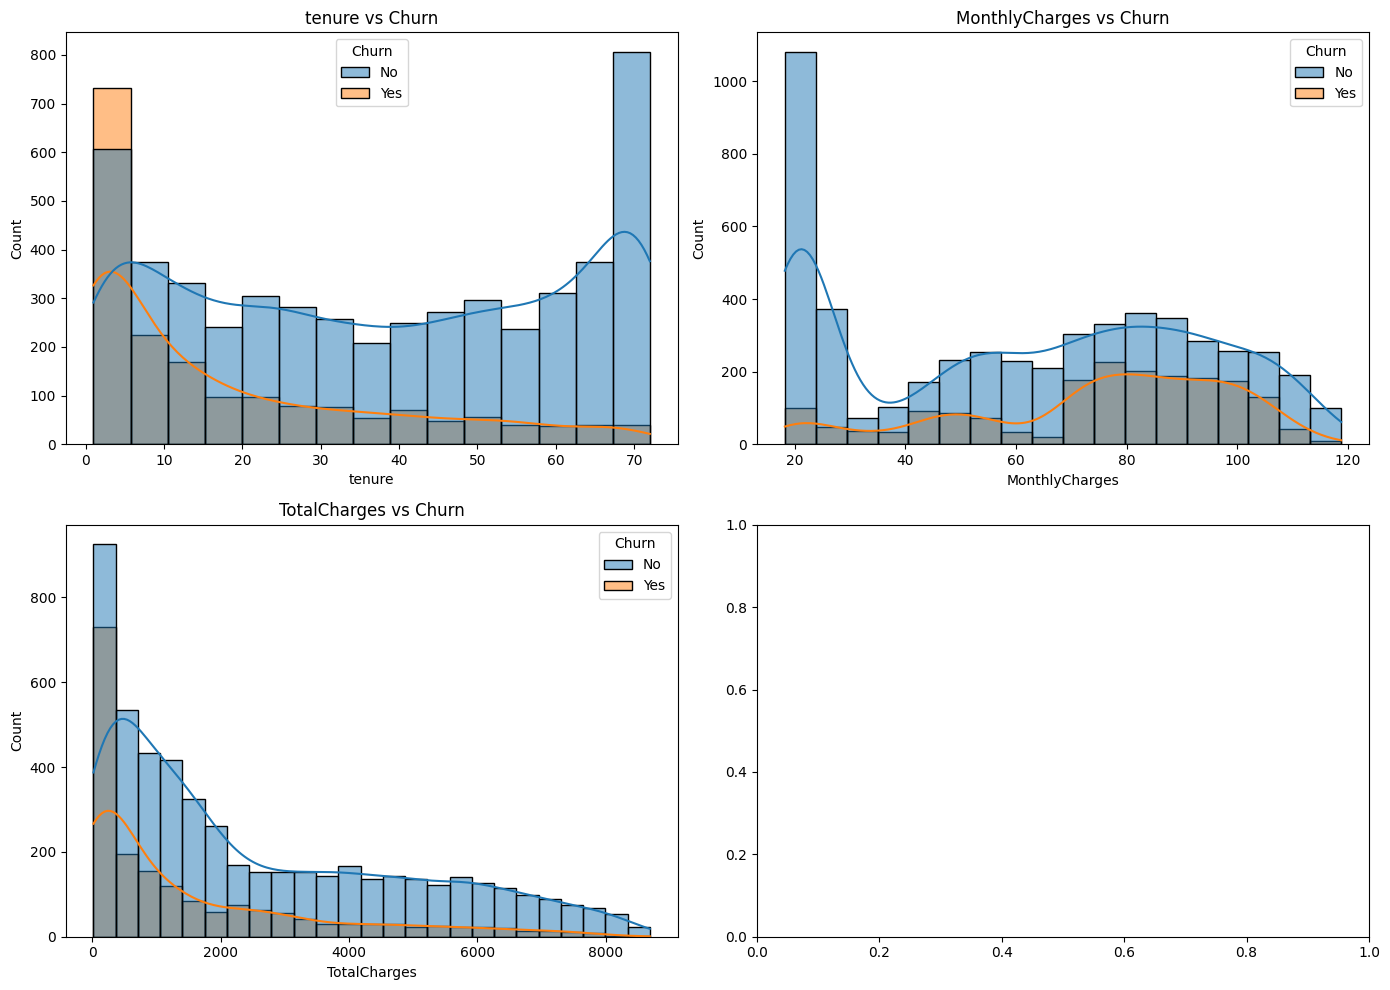

In [39]:
def plot_histograms(df, numerical_features, target):
    """
    Create a grid of histograms for numerical features against the target.
    
    Parameters:
    - df: DataFrame containing the data
    - numerical_features: List of numerical column names to plot
    - target: The target column name
    """
    # Number of features to plot
    num_features = len(numerical_features)
    
    # Calculate number of rows and columns for the subplot grid
    nrows = (num_features + 1) // 2
    ncols = 2 if num_features > 1 else 1
    
    # Create subplots
    fig, axarr = plt.subplots(nrows, ncols, figsize=(14, 10))
    
    # Flatten the axes array for easy iteration if there are multiple subplots
    axarr = axarr.flatten()
    
    # Plot each numerical feature against the target
    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df, x=feature, hue=target, kde=True, ax=axarr[i])
        axarr[i].set_title(f'{feature} vs {target}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

plot_histograms(df=train_df, numerical_features=num_features_real,target=target)

- **Tenure vs Churn:**  
    - Most customers who churn (churn = 1) tend to have a low tenure, particularly in the first few months.  
    - The churn rate decreases as tenure increases, with very few customers leaving after a long period.  
    - This suggests that customers who stay longer are less likely to leave, indicating a possible loyalty factor.  

- **Monthly Charges vs Churn:**  
    - Customers with higher monthly charges tend to have a higher churn rate compared to those with lower charges.  
    - The churn distribution shows that customers paying in the lower range of monthly charges are less likely to churn.  
      The graph indicates that most non-churning customers have monthly charges between **$20 and $30**.  

- **Total Charges vs Churn:**  
    - Customers with lower total charges exhibit a higher churn rate, similar to the pattern observed with tenure.  
    - As total charges increase, customer churn becomes less common.  
      This is expected since total charges are influenced by tenure—customers with a longer tenure accumulate higher total charges  
      and are less likely to cancel their service.  

- There are **no extreme outliers** in the dataset, except for a few cases in total charges among customers who churned.  


## Categorical variables

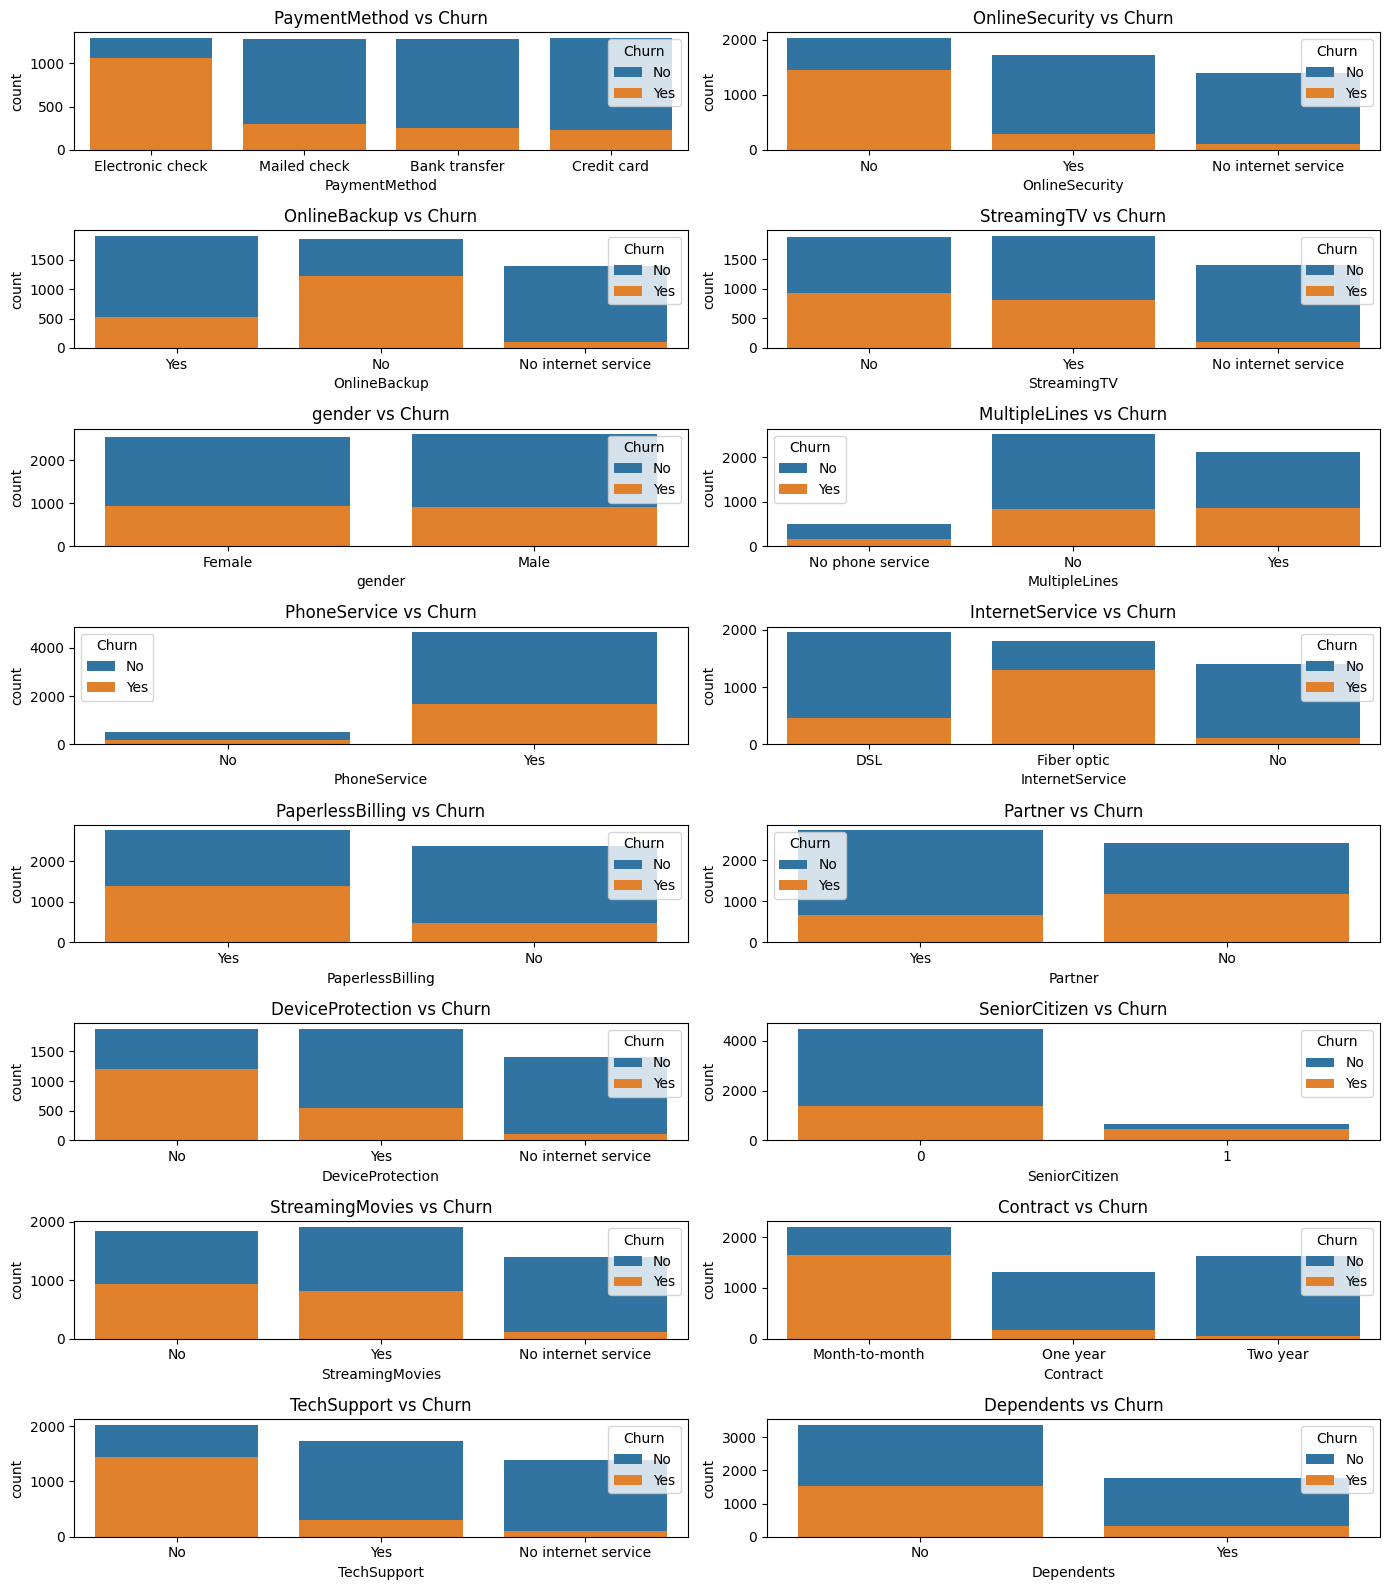

In [40]:
def plot_stacked_countplots(df, categorical_features, target):
    """
    Create a 2x2 grid of stacked countplots for categorical features against the target.
    
    Parameters:
    - df: DataFrame containing the data
    - categorical_features: List of categorical column names to plot
    - target: The target column name
    """
    # Number of features to plot
    num_features = len(categorical_features)
    
    # Calculate number of rows and columns for the subplot grid
    nrows = (num_features + 1) // 2
    ncols = 2 if num_features > 1 else 1
    
    # Create subplots
    fig, axarr = plt.subplots(nrows, ncols, figsize=(14, 16))
    
    # Flatten the axes array for easy iteration if there are multiple subplots
    axarr = axarr.flatten()
    
    # Plot each categorical feature against the target
    for i, feature in enumerate(categorical_features):
        sns.countplot(x=feature, hue=target, data=df, dodge=False, ax=axarr[i])
        axarr[i].set_title(f'{feature} vs {target}')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

df_copy = train_df.copy()

# Modify column metodo de pago for simpler visualization
df_copy['PaymentMethod'] = df_copy['PaymentMethod'].str.replace(' (automatic)', '')

plot_stacked_countplots(df=df_copy, categorical_features= cat_features_real,target=target)

- **Contract Type vs Churn:**  
    - Month-to-month contracts have significantly higher churn rates compared to one-year or two-year contracts.  
    - Customers with long-term contracts (one or two years) are less likely to churn.  

- **Partner vs Churn:**  
    - Customers without a partner ("No") have a higher churn rate compared to those with a partner ("Yes").  

- **Internet Service vs Churn:**  
    - Fiber-optic Internet users show higher churn rates compared to DSL users.  
    - Customers without Internet service have the lowest churn rate.  

- **Dependents vs Churn:**  
    - Customers with dependents ("Yes") have lower churn rates compared to those without dependents.  

- **Online Security vs Churn:**  
    - Customers without online security services have a higher churn rate compared to those who have them.  

- **Device Protection vs Churn:**  
    - Similar to online security, customers without device protection services are more likely to churn.  

- **Gender vs Churn:**  
    - Churn rates appear similar between males and females, suggesting that gender is not a significant factor in customer attrition.  

- **Payment Method vs Churn:**  
    - Customers using electronic checks have the highest churn rate, while those using credit cards or bank transfers have lower churn rates.  

- **Streaming TV vs Churn & Streaming Movies vs Churn:**  
    - Customers with and without streaming TV services ("Yes" and "No") have similar churn rates,  
      while those in the "No Internet Service" category show significantly lower churn rates.  
      The same pattern is observed with streaming movies.  

- **Paperless Billing vs Churn:**  
    - Customers who use paperless billing ("Yes") show higher churn rates compared to those who do not.  

- **Senior Citizen vs Churn:**  
    - Senior citizens make up a smaller subset of total customers but appear to churn at a slightly higher rate than non-senior customers.  

- **Online Backup vs Churn:**  
    - Customers without online backup services have higher churn rates compared to those who have the service.  

- **Tech Support vs Churn:**  
    - Customers without technical support services have higher churn rates compared to those who have the service.  

- **Phone Service vs Churn:**  
    - Customers with phone service have a higher absolute number of churn cases simply because they form the majority of the customer base.  
      This means phone service alone may not be a strong predictor of churn, similar to multiple lines.  


In [47]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7010 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7010 non-null   object 
 1   SeniorCitizen     7010 non-null   int64  
 2   Partner           7010 non-null   object 
 3   Dependents        7010 non-null   object 
 4   tenure            7010 non-null   int64  
 5   PhoneService      7010 non-null   object 
 6   MultipleLines     7010 non-null   object 
 7   InternetService   7010 non-null   object 
 8   OnlineSecurity    7010 non-null   object 
 9   OnlineBackup      7010 non-null   object 
 10  DeviceProtection  7010 non-null   object 
 11  TechSupport       7010 non-null   object 
 12  StreamingTV       7010 non-null   object 
 13  StreamingMovies   7010 non-null   object 
 14  Contract          7010 non-null   object 
 15  PaperlessBilling  7010 non-null   object 
 16  PaymentMethod     7010 non-null   object 
 17  

In [54]:
from dython.nominal import theils_u, cramers_v

# Cramér’s V between 'Churn' and 'Contract' (Symmetric)
cramer_value = cramers_v(train_df['Churn'], train_df['Contract'])
print(f"Cramér’s V (Churn ↔ Contract): {cramer_value}")

Cramér’s V (Churn ↔ Contract): 0.40905156022585487


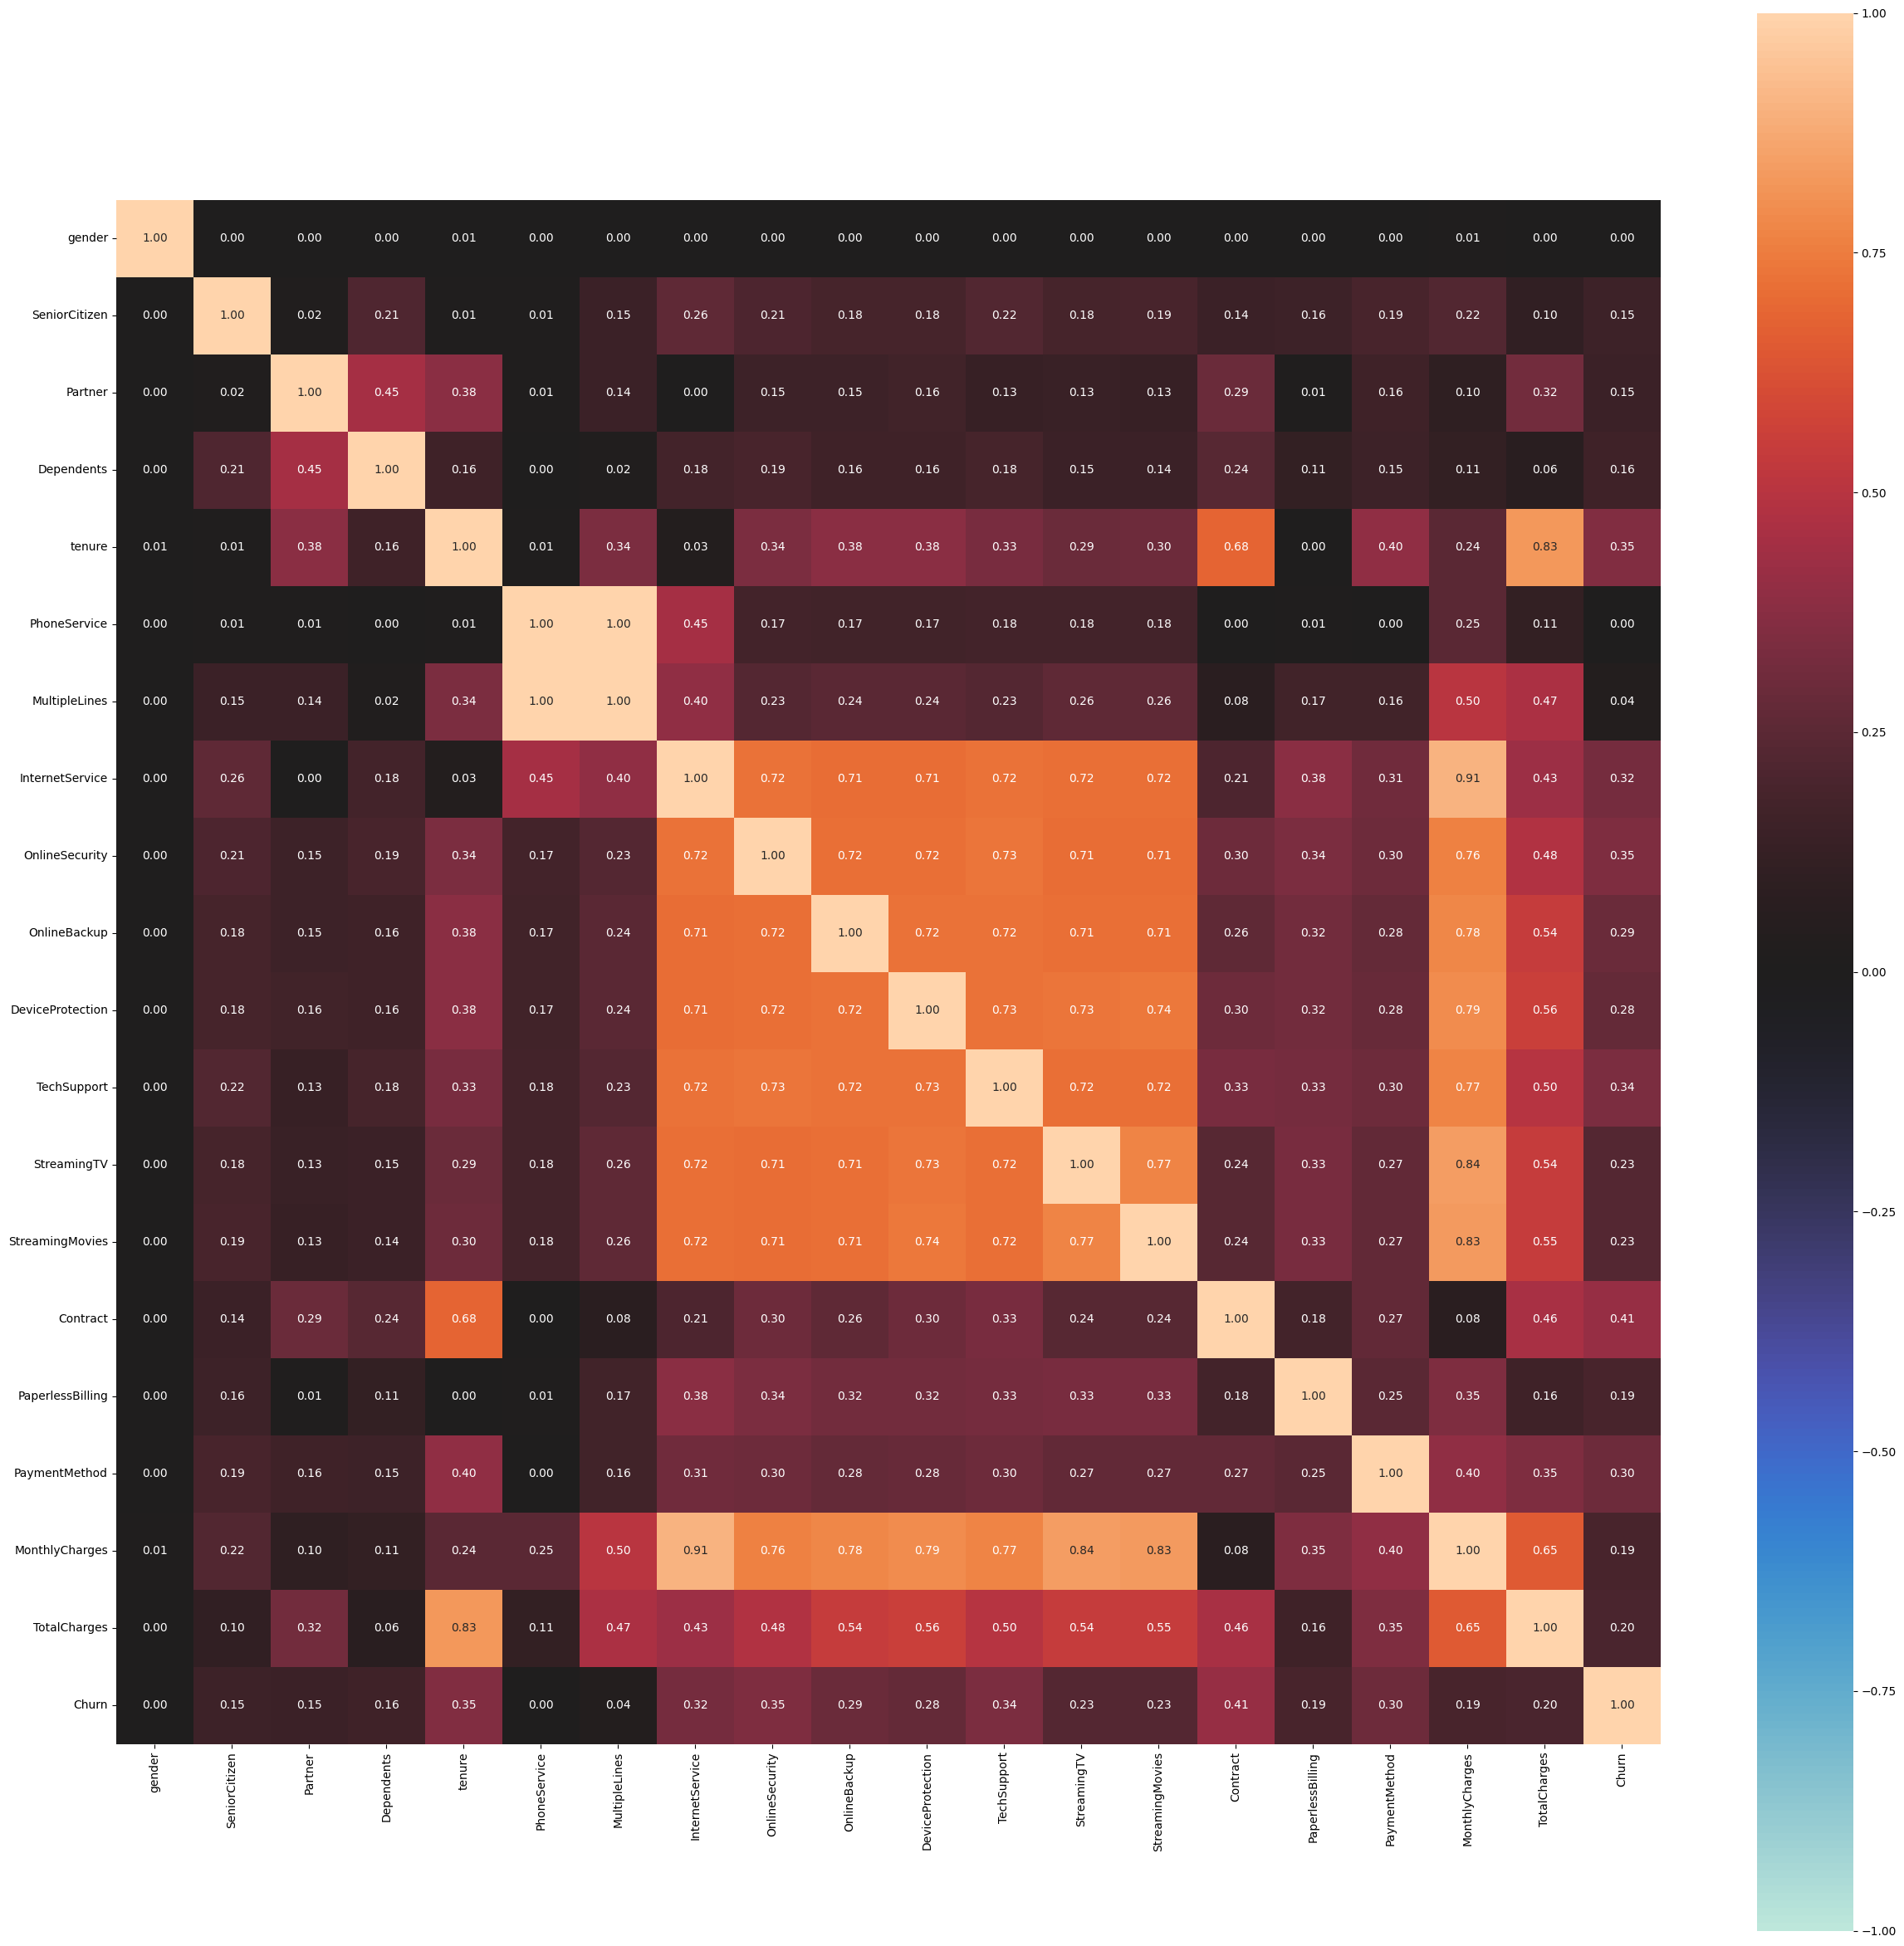

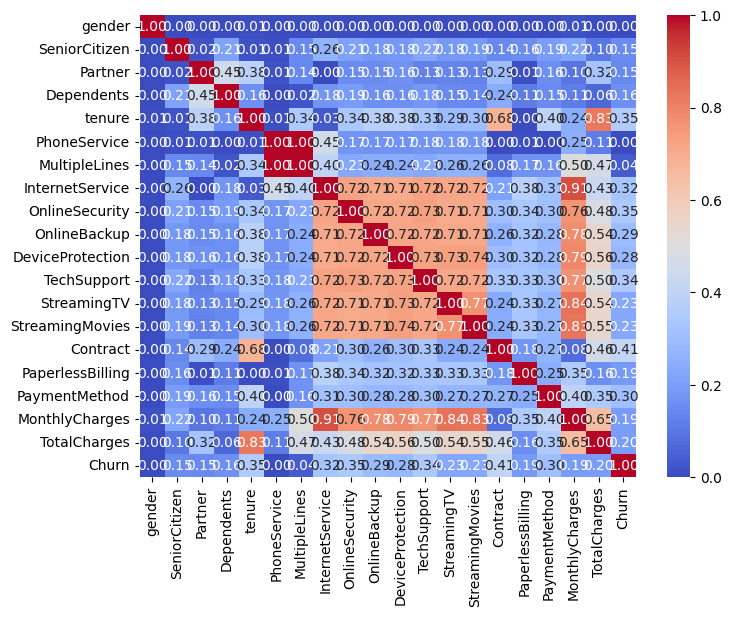

In [48]:
from dython.nominal import associations

# Computes the correlation between all categorical and numerical columns 
associations_df = associations(train_df, plot=True)

# Get the correlation matrix
corr_matrix = associations_df['corr']

# Plot the heatmap
plt.figure(figsize=(8, 6))  # Adjust the size if needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

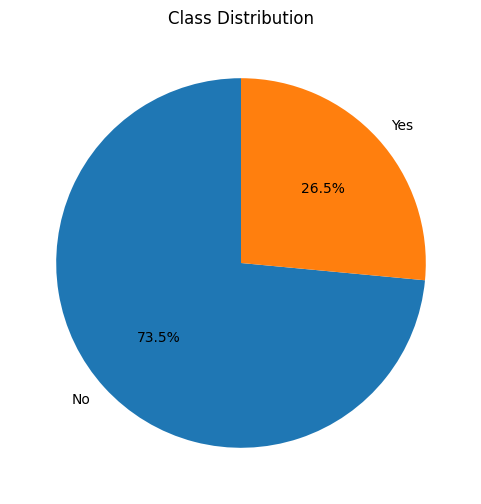

In [42]:
X = train_df.drop(columns=[target])  # Features
y = train_df[target]                # Target/Label

# Calculate the class distribution
unique, counts = np.unique(y, return_counts=True)

# Plot pie chart
plt.figure(figsize=(6, 6))
plt.pie(counts, labels=unique, autopct='%1.1f%%', startangle=90)
plt.title('Class Distribution')
plt.show()

### **Class Distribution: Churn vs. Non-Churn**

The dataset exhibits an **imbalanced class distribution**, where:  
- **76.6%** of customers **did not churn** (majority class).  
- **26.4%** of customers **churned** (minority class).  

#### **Implications of Class Imbalance**  
Since the dataset is imbalanced, a predictive model might **favor the majority class (non-churn) and struggle to correctly identify churners**. To improve model performance, strategies such as:
- **Oversampling** the minority class (Churn)  
- **Undersampling** the majority class (Non-Churn)  
- Using **class weights** in the loss function  
- Employing **advanced techniques like SMOTE or focal loss** 

## Correlation Analysis

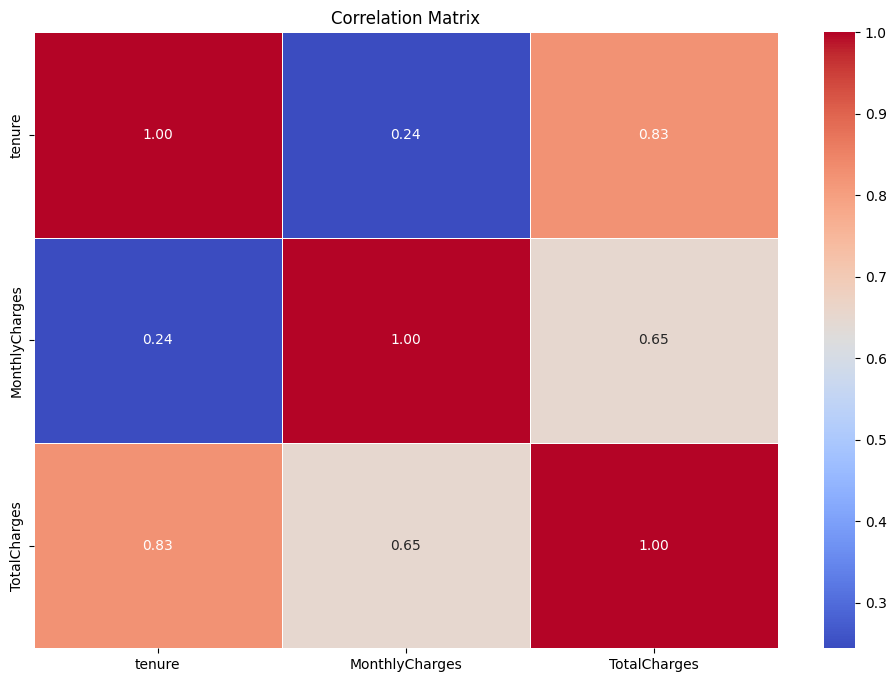

In [43]:
# Calculate correlation matrix on continuous data
corr_matrix = train_df[num_features_real].corr(method='pearson')

# Plot correlation matrix using heatmap for visualization
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

### **Feature Correlation Analysis**

#### **Relationship between Tenure and Total Charges (0.83)**
- There is a strong positive correlation between these two variables (**tenure** and **total charges**).
- **Total charges** are highly influenced by customer tenure. The longer a customer stays with the service, the more total charges they accumulate.
- Therefore, if tenure is already known, **total charges do not add much unique information** for prediction since they are closely related.

#### **Relationship between Monthly Charges and Total Charges (0.65)**
- There is a **moderate positive correlation** between these variables.
- **Total charges** are also influenced by **monthly charges** (in addition to tenure). Customers with higher **monthly charges** tend to accumulate higher **total charges**, but the relationship is not perfectly linear.
- Although the correlation is not as strong as with **tenure**, this relationship indicates that **total charges** can be explained by a **combination of tenure and monthly charges**.

#### **Relationship between Tenure and Monthly Charges (0.24)**
- There is a **low positive correlation**.
- **Monthly charges** are not strongly dependent on tenure. It is likely that **monthly charges** are more related to the services the customer has subscribed to rather than the duration of their relationship with the company.
- These two variables are **not redundant** because they capture different aspects of customer behavior.

#### **Modeling Considerations**
- Including **highly correlated variables** can cause **multicollinearity issues**.
- Therefore, only **tenure** and **monthly charges** will be selected as **numerical features**, as they capture fundamental aspects of customer behavior.
